# Imports

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [45]:
data = pd.read_csv('../data/application_train_vf.csv')
# validation = pd.read_csv('./data/application_test_vf.csv')
# bureau = pd.read_csv('./data/bureau.csv')
# credit_card = pd.read_csv('./data/credit_card_balance.csv')
# bureau_balance = pd.read_csv('./data/bureau_balance.csv')
# install_pay = pd.read_csv('./data/installments_payments.csv')
# pos_cash = pd.read_csv('./data/POS_CASH_balance.csv')
# previous_app = pd.read_csv('./data/previous_application.csv')

# Dates

In [46]:
data['date_mensuelle'] = pd.to_datetime(data['date_mensuelle'])

In [47]:
data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,date_mensuelle
0,0,333721,0,Cash loans,M,Y,Y,1,292500.0,1102500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2013-01-01
1,1,250254,0,Cash loans,F,N,Y,0,180000.0,270000.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,5.0,2013-01-01
2,2,265071,0,Cash loans,F,Y,N,2,67500.0,80865.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-01
3,3,227569,0,Cash loans,F,Y,Y,1,157500.0,1078200.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-01
4,4,212616,0,Cash loans,F,N,N,1,112500.0,225000.0,...,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0,2013-01-01


## Study of some datas

cibles : ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_5', 'OBS_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_16',
             'FLAG_DOCUMENT_13', 'Unnamed: 0', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_4', 'AMT_REQ_CREDIT_BUREAU_QRT',
             'FLAG_DOCUMENT_17', 'AMT_REQ_CREDIT_BUREAU_DAY', 'date_mensuelle', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_9',
             'FLAG_DOCUMENT_14', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_19',
             'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_21',
             'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_7', 'SK_ID_CURR', 'TARGET', 'AMT_REQ_CREDIT_BUREAU_MON',
             'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_6']

In [48]:
data = data[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_5', 'OBS_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_16',
             'FLAG_DOCUMENT_13', 'Unnamed: 0', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_4', 'AMT_REQ_CREDIT_BUREAU_QRT',
             'FLAG_DOCUMENT_17', 'AMT_REQ_CREDIT_BUREAU_DAY', 'date_mensuelle', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_9',
             'FLAG_DOCUMENT_14', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_19',
             'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_21',
             'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_7', 'SK_ID_CURR', 'TARGET', 'AMT_REQ_CREDIT_BUREAU_MON',
             'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_6', "date_mensuelle","TARGET"]]
data.head()

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_5,OBS_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_16,FLAG_DOCUMENT_13,Unnamed: 0,AMT_REQ_CREDIT_BUREAU_HOUR,FLAG_DOCUMENT_4,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_DOCUMENT_17,...,FLAG_DOCUMENT_7,SK_ID_CURR,TARGET,AMT_REQ_CREDIT_BUREAU_MON,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_20,FLAG_DOCUMENT_8,FLAG_DOCUMENT_6,date_mensuelle,TARGET
0,0,0,1.0,0,0,0,0.0,0,0.0,0,...,0,333721,0,0.0,0.0,0,0,0,2013-01-01,0
1,0,0,0.0,0,0,1,0.0,0,1.0,0,...,0,250254,0,1.0,-17.0,0,0,0,2013-01-01,0
2,0,0,0.0,0,0,2,0.0,0,0.0,0,...,0,265071,0,0.0,-358.0,0,0,0,2013-01-01,0
3,0,0,0.0,0,0,3,0.0,0,0.0,0,...,0,227569,0,0.0,-375.0,0,0,0,2013-01-01,0
4,0,0,0.0,0,0,4,0.0,0,2.0,0,...,0,212616,0,0.0,-2557.0,0,0,0,2013-01-01,0


In [49]:
data.dtypes

FLAG_DOCUMENT_2                        int64
FLAG_DOCUMENT_5                        int64
OBS_60_CNT_SOCIAL_CIRCLE             float64
FLAG_DOCUMENT_16                       int64
FLAG_DOCUMENT_13                       int64
Unnamed: 0                             int64
AMT_REQ_CREDIT_BUREAU_HOUR           float64
FLAG_DOCUMENT_4                        int64
AMT_REQ_CREDIT_BUREAU_QRT            float64
FLAG_DOCUMENT_17                       int64
AMT_REQ_CREDIT_BUREAU_DAY            float64
date_mensuelle                datetime64[ns]
FLAG_DOCUMENT_3                        int64
FLAG_DOCUMENT_9                        int64
FLAG_DOCUMENT_14                       int64
DEF_60_CNT_SOCIAL_CIRCLE             float64
FLAG_DOCUMENT_10                       int64
FLAG_DOCUMENT_11                       int64
FLAG_DOCUMENT_19                       int64
AMT_REQ_CREDIT_BUREAU_WEEK           float64
AMT_REQ_CREDIT_BUREAU_YEAR           float64
FLAG_DOCUMENT_15                       int64
FLAG_DOCUM

# Missing values

## Variables catégorielles

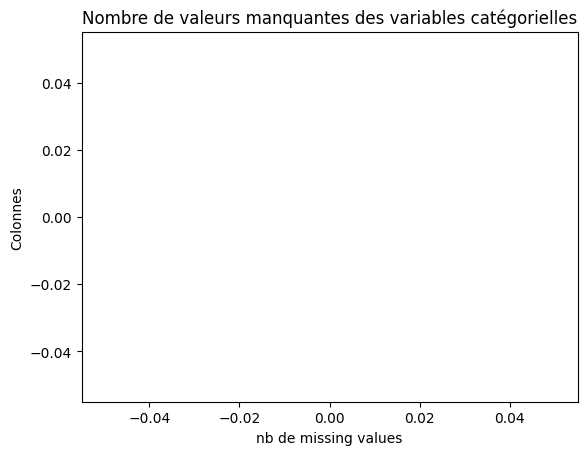

In [50]:
missing_values = data.select_dtypes(include = 'object').isna().sum()

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('nb de missing values')
plt.ylabel('Colonnes')
plt.title('Nombre de valeurs manquantes des variables catégorielles')

plt.show()

In [51]:
nb_missing = data.isna().sum()/data.shape[0]*100

for i in data.columns:
    if nb_missing[i] > 1:
        print(i, nb_missing[i])


AMT_REQ_CREDIT_BUREAU_HOUR 13.481887052566584
AMT_REQ_CREDIT_BUREAU_QRT 13.481887052566584
AMT_REQ_CREDIT_BUREAU_DAY 13.481887052566584


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Variables indicatrices

FLAG_DOCUMENT_2     0
FLAG_DOCUMENT_8     0
FLAG_DOCUMENT_20    0
TARGET              0
SK_ID_CURR          0
FLAG_DOCUMENT_7     0
FLAG_DOCUMENT_18    0
FLAG_DOCUMENT_21    0
FLAG_DOCUMENT_12    0
FLAG_DOCUMENT_15    0
FLAG_DOCUMENT_19    0
FLAG_DOCUMENT_11    0
FLAG_DOCUMENT_10    0
FLAG_DOCUMENT_14    0
FLAG_DOCUMENT_9     0
FLAG_DOCUMENT_3     0
FLAG_DOCUMENT_17    0
FLAG_DOCUMENT_4     0
Unnamed: 0          0
FLAG_DOCUMENT_13    0
FLAG_DOCUMENT_16    0
FLAG_DOCUMENT_5     0
FLAG_DOCUMENT_6     0
TARGET              0
dtype: int64


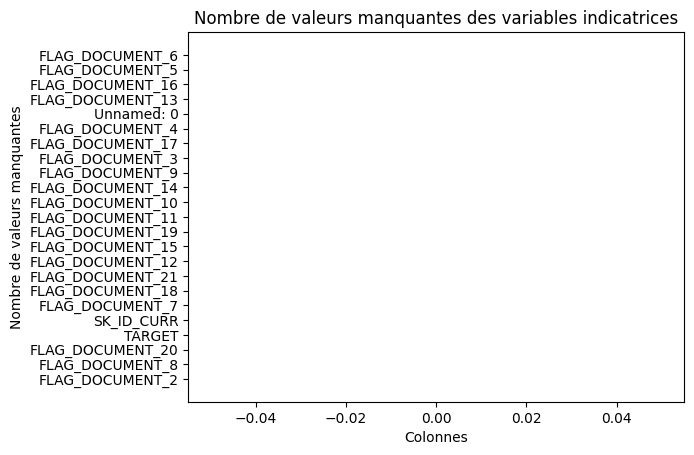

In [52]:
missing_values = data.select_dtypes(include = 'int').isna().sum()

missing_values = missing_values.sort_values(ascending=True)
print(missing_values)
plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables indicatrices')

plt.show()

## Variables continues

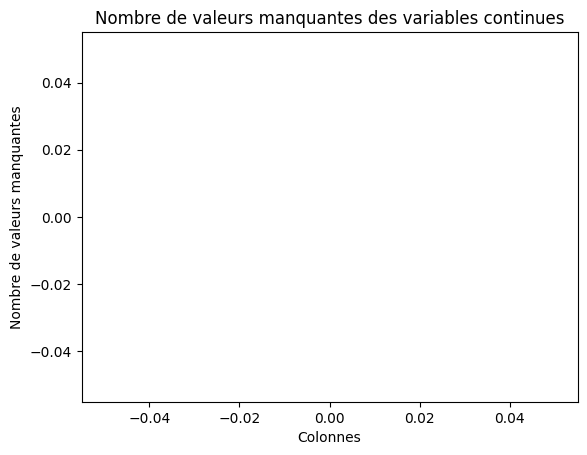

In [53]:
missing_values = data.select_dtypes(include = 'float').isna().sum()

missing_values = missing_values[missing_values>155000]

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables continues')

plt.show()

In [54]:
nb_missing = missing_values/data.shape[0]*100
nb_missing

Series([], dtype: float64)

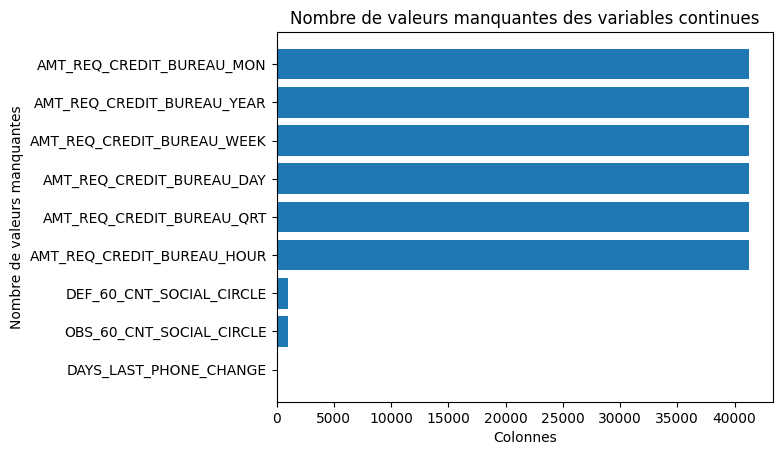

In [55]:
missing_values = data.select_dtypes(include = 'float').isna().sum()

missing_values = missing_values[missing_values<155000]

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables continues')

plt.show()

In [56]:
nb_missing = missing_values/data.shape[0]*100
nb_missing

DAYS_LAST_PHONE_CHANGE         0.000327
OBS_60_CNT_SOCIAL_CIRCLE       0.332890
DEF_60_CNT_SOCIAL_CIRCLE       0.332890
AMT_REQ_CREDIT_BUREAU_HOUR    13.481887
AMT_REQ_CREDIT_BUREAU_QRT     13.481887
AMT_REQ_CREDIT_BUREAU_DAY     13.481887
AMT_REQ_CREDIT_BUREAU_WEEK    13.481887
AMT_REQ_CREDIT_BUREAU_YEAR    13.481887
AMT_REQ_CREDIT_BUREAU_MON     13.481887
dtype: float64

In [57]:
for col in data.select_dtypes(include ='float').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

/var/folders/cs/hh3_26_57sx7l8sdk574zbdh0000gn/T/ipykernel_22083/2370438444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [58]:
missing_values = data.select_dtypes(include = 'float').isna().sum()
missing_values

OBS_60_CNT_SOCIAL_CIRCLE      0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_DAY     0
DEF_60_CNT_SOCIAL_CIRCLE      0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_MON     0
DAYS_LAST_PHONE_CHANGE        0
dtype: int64

# Variables numériques

/Users/SamuelLP/Desktop/git/Challenge_Nexialog/.nexialog_venv/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/SamuelLP/Desktop/git/Challenge_Nexialog/.nexialog_venv/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/SamuelLP/Desktop/git/Challenge_Nexialog/.nexialog_venv/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/SamuelLP/Desktop/git/Challenge_Nexialog/.nexialog_venv/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGr

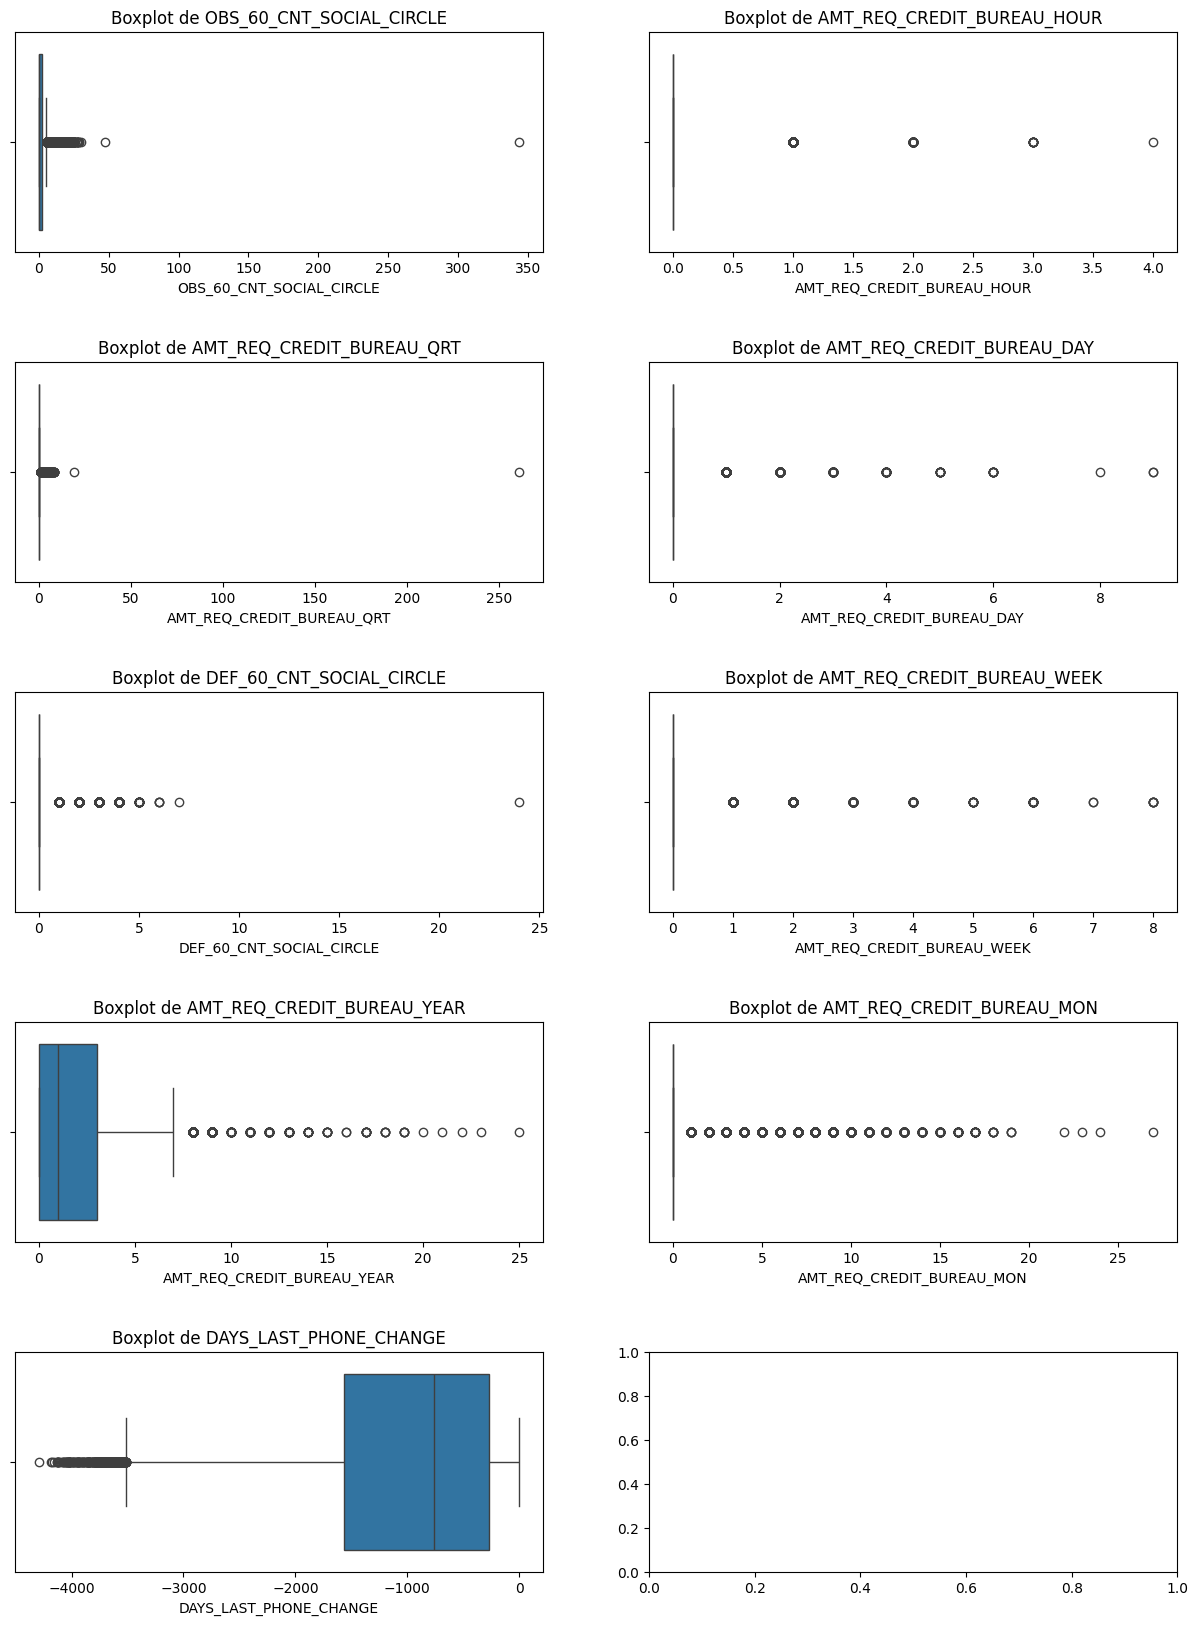

In [59]:
float_columns = data.select_dtypes(include='float').columns

num_cols = 2
num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(float_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

plt.show()

## DISCRETISATION DES NUMERIQUES